# Final exam review

What did we learn in this course?

1. Python basics:
   - [Python_1.ipynb](../01-py-intro/Python_1.ipynb)
   - [Python_2.ipynb](../01-py-intro/Python_2.ipynb) 
3. Numpy basics:
   - [NumpyTutorial.ipynb](../06-pytorch/NumpyTutorial.ipynb)
5. Linear Regression by vector derivatives:
   - [LinearModels.ipynb](../02-linear-models/LinearModels.ipynb),
   - [PlaneFitProblem](../02-linear-models/PlaneFitProblem.ipynb),
   - [Hessians](../02-linear-models/Hessians.ipynb),
   - [Practice Problems for Midterm 1](<../04-review/Practice Problems 20240222.ipynb>), 
6. Optimization by Gradient descent:
   - [ContinuousOptimization.ipynb](../02-linear-models/ContinuousOptimization.ipynb)
7. 1-Layer Neural Network: [Perceptron3.ipynb](../02-linear-models/Perceptron3.ipynb)

8. Pre-midterm review: [Practice Problems](<../04-review/Practice Problems 20240222.ipynb>)

## Decision Theory:
   - Lecture notes: [decision-theory.pdf](../021-decision-theory/2024-03-05-decision-theory.pdf). Additional resources:
   - [Chapter 2 of MLStory book](https://mlstory.org/prediction.html)

### Bayes Rule
##### Question: 
Given two random variables $X$ and $Y$ specify the relationship between $P(X|Y)$ and $P(Y|X)$ using Bayes rule?

##### Answer

$$ P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)}$$

$\newcommand{\calD}{\mathcal{D}}$
$\newcommand{\bfW}{\mathbf{W}}$

##### Question:
Using CIFAR 10 dataset $\calD$ you want to find your neural network with weights $\bfW$. Define Prior, Likelihood and Posterior in terms of the weights $\bfW$ and data $\calD$. Write Bayes rule to determin posterior from likehood and prior.

##### Answer: 

- Prior is $P(\bfW)$ i.e. the probability of weights $\bfW$ before we have seen the dataset.
- Likelihood is $P(\calD|\bfW)$ i.e. the probability of observing the dataset once if we pick a particular choice of weighs $\bfW$.
- Posterior is $P(\bfW|\calD)$ i.e the probability of chosing weights given the dataset $\calD$.

By Bayes rule, we have:

$$ P(\bfW|\calD) = \frac{P(\calD|\bfW)P(\bfW)}{P(\calD)}$$

#### How can regularization can be interpretted as an application of the Bayes theorem?

$\newcommand{\bfx}{\mathbf{x}}$
Given the dataset $\calD = \{ (\bfx_1, y_1), \dots, (\bfx_n, y_n) \}$, a model $\hat{y}_i = f(\bfx_i; \theta)$, a regularizer $R(\theta)$ and a loss function $l(y_i, \hat{y}_i)$, show that the following optimization problem can be interpreted as maximum-a-posteriori estimation. In the process show that for the interpretation, we need the IID (independently, identically distributed) assumption over the dataset. List any other assumptions that you need for the interpretation.

$$ \theta^* = \arg~\min_\theta \sum_{i=1}^n l(y_i, f(\bfx_i; \theta)) + \lambda R(\theta),$$

where $\lambda$ is some positive constant that balances between the loss function and the regularizer.

#### A24:

Let the $\bfx_i$ and $y_i$ be random vectors for all $i$. Model the probability distribution as a negative log of the loss function:

$$ P((\bfx_i, y_i)| \theta) = \frac{1}{Z} \exp(-l(y_i, f(\bfx_i; \theta)).$$

If the samples are IID, then we can write the probability of the entire dataset as products of sample probabilities

$$ P(\calD|\theta) = \prod_{i=1}^n P((\bfx_i, y_i)| \theta) $$

$$ P(\calD|\theta) = \prod_{i=1}^n \frac{1}{Z} \exp(-l(y_i, f(\bfx_i; \theta)).$$

A product of exponents is the summation of their powers,

$$ P(\calD|\theta) = \frac{1}{Z} \exp(-\sum_{i=1}^n l(y_i, f(\bfx_i; \theta)).$$

Denote $$ L(\calD; \theta) = \sum_{i=1}^n l(y_i, f(\bfx_i; \theta).$$

The original optimization problem can be written as:
$$ \theta^* = \arg~\min_\theta L(\calD; \theta) + \lambda R(\theta)$$

Taking negative exponent on both sides turns the problem into a maximization problem because $\exp(-y)$ is a monotonically decreasing function.
$$ \theta^* = \arg~\max_\theta \exp(-L(\calD; \theta))\exp(-\lambda R(\theta))$$

The first term is the same as maximizing the likelihood $P(\calD|\theta)$. If we interpret the second term as a prior:
$$ P(\theta) = \frac{1}{Z'} \exp(-\lambda R(\theta)),$$

then we can rewrite the original optimization problem as

$$ \theta^* = \arg~\max_\theta P(\calD|\theta) P(\theta) $$

By Bayes theorem $P(\calD|\theta) P(\theta) = P(\theta|\calD)P(\calD)$, hence we can write the optimization problem as maximizing the posterior

$$ \theta^* = \arg~\max_\theta P(\theta|\calD) P(\calD).$$

We can ignore the evidence term $P(\calD)$, because it is independent of $\theta$ the optimization variable. The original problem reduces to maximizing the posterior, hence maximum a posteriori:

$$ \theta^* = \arg~\max_\theta P(\theta|\calD)$$

##### Question:
You are doing 0-1 binary classification on the MNIST hand digit classification task. Let detecting the digit 1 be considered the positive class. Using this example, define the terms False negative, False positive, Accuracy, Precision, recall, F1-score.

##### Answer:
- False negative: is the case when the predictor classifies the digit as negative i.e. 0 but it is actually 1.
- False positive: is the case when the predictor classifies the digit as positive i.e. 1 but it is actually 0.
- Accuracy: Total correct classifictions/Total samples .
- Precision: True positives / Predicted positives.
- Recall: True positives / All actual positives.

##### Question:
What is a ROC (Receiver Operating characteristics) for a binary classifier? Argue why it lies above the diagonal for any reasonable classifier? Also, argue why it must be concave?

##### Answer:
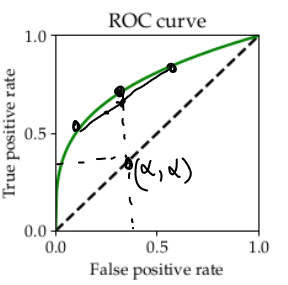

ROC curve is plot between False positive rate (FPR) $P(\hat{Y}(X) = 1| Y=0)$ and True positive rate (TPR) $P(\hat{Y}(X) = 1| Y = 1)$. 

ROC curve is always lies above the diagonal because you can construct a trivial classifier that predicts the positive class with probability $\alpha \in (0, 1)$, i.e. $P(\hat{Y} = 1) = \alpha$ without even looking at the input data $X$. This trivial classifier will form the diagonal of the ROC curve with both FPR and TPR being equal to $\alpha$. Any classifier that works better than this trivial classifier will lie above the diagonal.

Suppose you are given a classifier whose  True positive rate (TPR) is $P(\hat{Y}(X; x_1) = 1| Y = 1) = f(x_1)$ at given FPR $P(\hat{Y}(X) = 1| Y=0) = x_1$ . Similarly at $FPR = x_2$, it's $TPR = f(x_2)$. If you mix these classifier with $\alpha \in (0, 1)$ and $1-\alpha$, then you have $FPR =\alpha  x_1 + (1-\alpha)  x_2$. and $TPR  = \alpha * f(x_1) + (1-\alpha) * f(x_2)$. If you get a better TPR than this mixture classifier, the ROC curve will be concave $TPR*(\alpha  x_1 + (1-\alpha) x_2) > \alpha * TPR(x_1) + (1-\alpha)  TPR(x_2)$.



##### Question:
What is the diference between Empirical risk and Expected risk?

##### Question:
What is the likelihood ratio test for a binary classifier? Is it better or worse than Posterior ratio test?

10. Multi-layer Perceptrons (MLPs): [MLP Using Pytorch.ipynb](<../06-pytorch/MLP\ Using\ Pytorch.ipynb>)
    - Count the number of trainable weights in a two layer MLP with 3x32x32 size input vector, 10 hidden units and 10 output units.
      

12. Automatic Differentiation:
    - [Autograd.ipynb](../03-autograd/Autograd.ipynb)
    - [AutogradNumpy.ipynb](../03-autograd/AutogradNumpy.ipynb)
    - [microtorch_mlp.ipynb](../04-mlp/microtorch_mlp.ipynb)